# INFRAESTRUTURA

- O Python utilizado esta na versão 3.10.8
- O Ambiente virtual foi criado com o Poetry - Tem um print do terminal com o comando 'poetry env list'
- O Arquivo de requeriments.txt está no repositório Git e na pasta zipada em anexo
- Link para GitHub: https://github.com/andre-lucena12/Algoritmos-Nao-Supervisionados-para-Clusterizacao



In [1]:
#IMPORTS
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.spatial as scp

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors

# ESCOLHA DA BASE DE DADOS

## BAIXE OS DADOS

In [2]:
df_country_data = pd.read_csv('./Country-data.csv', index_col = 0)
df_country_data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


## QUANTOS PAÍSES EXISTEM NO DATA SET? MOSTRE ATRAVÉS DE GRÁFICOS A FAIXA DINÂMICA DAS VARIÁVEIS

### GRÁFICOS DE DISTRIBUIÇÃO

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

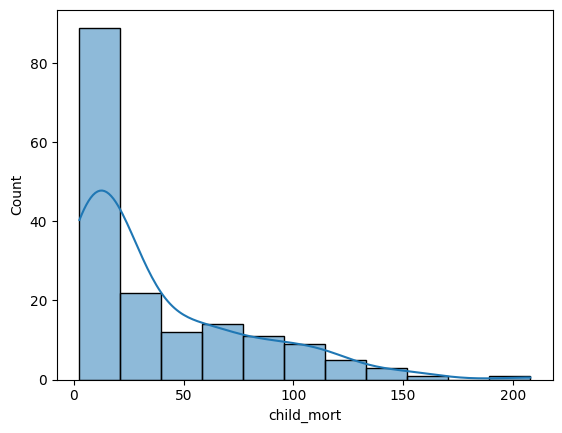

In [3]:
x_vars = df_country_data.columns
sns.histplot(data = df_country_data, x = x_vars[0], kde = True)
df_country_data[x_vars[0]].describe()

- Child_mort se refere a mortalidade infantil, com a morte de crianças menores que 5 anos por 1000 nascimentos.
O plot demonstra que a taxa de mortalidade é muito próxima de 0, sendo que quanto maior a taxa menos ela aparece no dataset, significando que, apesar de ser pouco, existem paises com a taxa de mortalidade infantil na ordem de 200 mortes por 1000 nascimentos.
    - Média = 38,2
    - Desvio Padrão = 40,32

count    167.000000
mean      41.108976
std       27.412010
min        0.109000
25%       23.800000
50%       35.000000
75%       51.350000
max      200.000000
Name: exports, dtype: float64

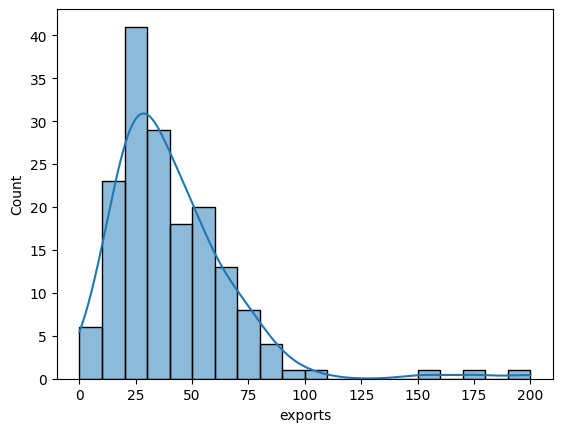

In [4]:
sns.histplot(data = df_country_data, x = x_vars[1], kde = True)
df_country_data[x_vars[1]].describe()

- Exports se refere a quantidade de exportações de bens e serviços per capita. O plot demonstra que a maioria dos países se encontra no intervalo entre 0 e 100, sendo sua maioria na ordem de 25. Existem alguns outliers entre 150 e 200.
    - Média = 41,10
    - Desvio Padrão = 27,41

count    167.000000
mean       6.815689
std        2.746837
min        1.810000
25%        4.920000
50%        6.320000
75%        8.600000
max       17.900000
Name: health, dtype: float64

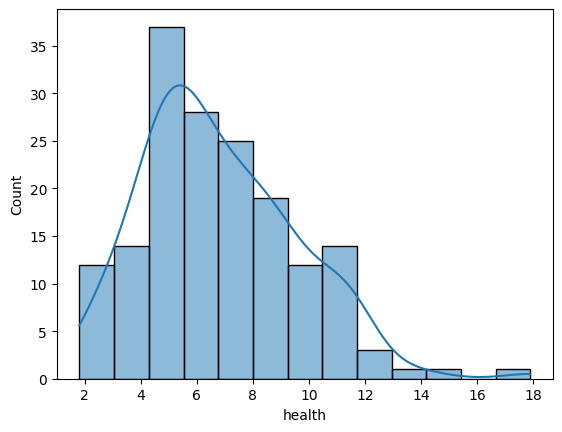

In [5]:
sns.histplot(data = df_country_data, x = x_vars[2], kde = True)
df_country_data[x_vars[2]].describe()

- Health se refere ao gasto total em saúde per capita. A feature tem uma distribuição normal, sem outliers.
    - Média = 6,81
    - Desvio Padrão = 2,74

count    167.000000
mean      46.890215
std       24.209589
min        0.065900
25%       30.200000
50%       43.300000
75%       58.750000
max      174.000000
Name: imports, dtype: float64

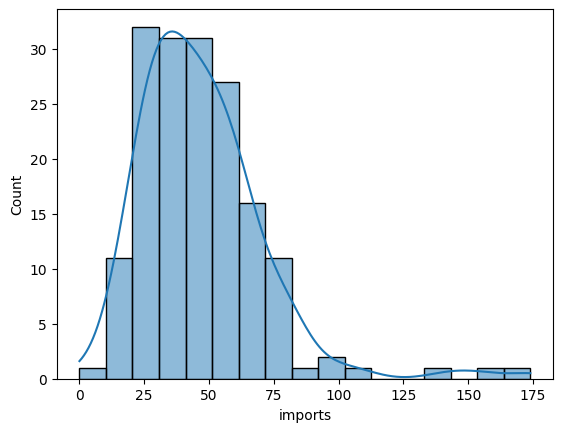

In [6]:
sns.histplot(data = df_country_data, x = x_vars[3], kde = True)
df_country_data[x_vars[3]].describe()

- Importes se refere ao número de importações de bens e serviços per capita. A sua maioria está entre o intervalo de 0 a 100, com alguns outrliers no intervalo de ~130 a 175.
    - Média = 46,89
    - Desvio Padrão = 24,20

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

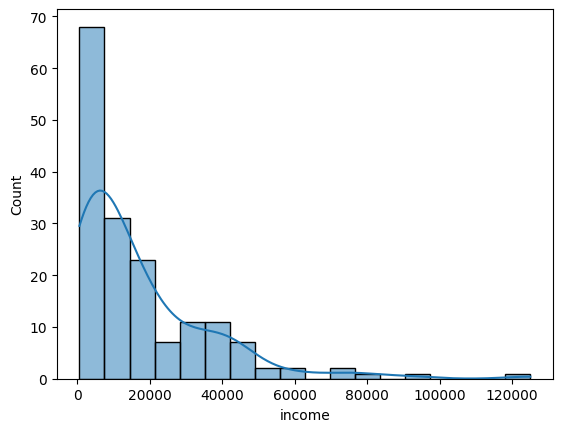

In [7]:
sns.histplot(data = df_country_data, x = x_vars[4], kde = True)
df_country_data[x_vars[4]].describe()

- Income se refere ao lucro liquído por pessoa, sua maioria esta entre 0 a 20000. 
    - Média = 17144,68
    - Desvio Padrão = 19278,06

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

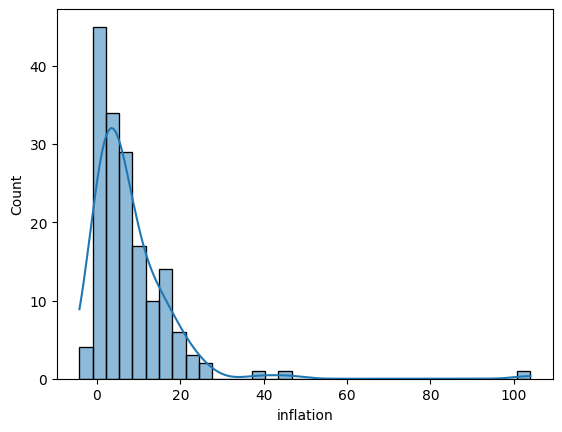

In [8]:
sns.histplot(data = df_country_data, x = x_vars[5], kde = True)
df_country_data[x_vars[5]].describe()

- Inflation se refere à inflação por si, descrita como a taxa de crescimento anual do PIB. A maioria dos dados está entre 0 e 20.
    - Média = 7,78
    - Desvio Padrão = 10,57

count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
max       82.800000
Name: life_expec, dtype: float64

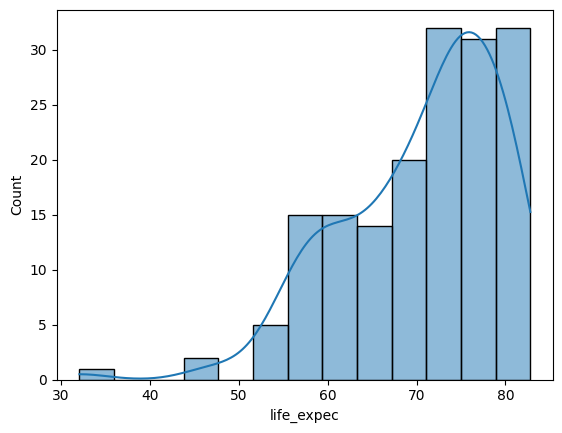

In [9]:
sns.histplot(data = df_country_data, x = x_vars[6], kde = True)
df_country_data[x_vars[6]].describe()

- life_expec é a expectativa de cada país, descrita como a quantidade de anos que um recém nascido viveria, caso os padrões de mortalidade se mantivessem ao longo de sua vida. A maioria das observações está no intervalo entre ~55 a ~85.
    - Média = 70,55
    - Desvio Padrão = 8,89

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64

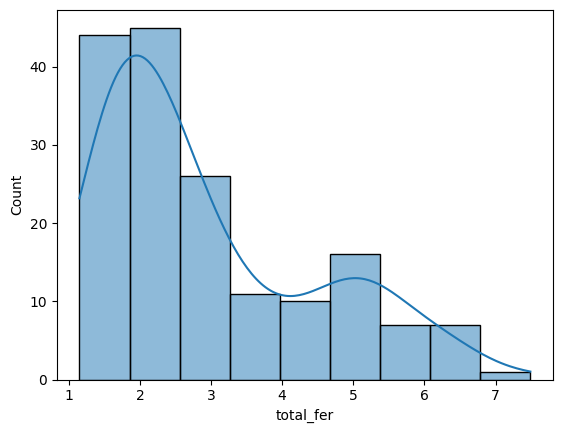

In [10]:
sns.histplot(data = df_country_data, x = x_vars[7], kde = True)
df_country_data[x_vars[7]].describe()

- total_fer é o indíce de fertilidade, ou taxa de natalidade, descrita como o número de filhos que cada mulher teria, caso as taxas de idade e fertilidade se mantivessem. Sua maioria esta entre o intervalo de 1 a 3 filhos, mas a feature não contém outliers e se comporta relativamente bem.
    - Média = 2,94
    - Desvio Padrão = 1,51

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

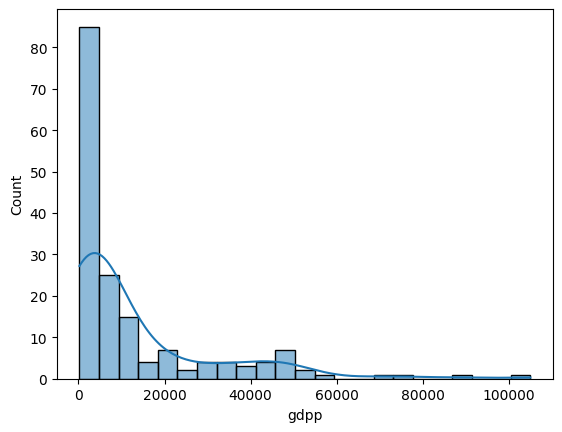

In [11]:
sns.histplot(data = df_country_data, x = x_vars[8], kde = True)
df_country_data[x_vars[8]].describe()

- gdpp é o PIB per capita. O indice do produto interno bruto divido pelo total de habitantes. A sua grande maioria esta entre 0 a ~20000. Existem alguns outliers entre 80000 a 100000.
    - Média = 12964,15
    - Desvio Padrão = 18328,70

## PRÉ-PROCESSAMENTO

Os dados do dataset estão em variâncias distintas. Para isso, o pré-processamento que deve ser realizado é o de normalização, com o objetivo de manter a variância das features iguais, com o fundamento de previnir o cluster de identificar distâncias euclidianas maiores em pontos especificos, tendênciando o cluster ao erro.

In [12]:
df_normalized_1 = ((df_country_data - df_country_data.mean())/df_country_data.std())
df_normalized_1.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-3.191060e-17,1.0,-0.884478,-0.744380,-0.470383,0.590889,4.208640
exports,167.0,2.340111e-16,1.0,-1.495694,-0.631438,-0.222858,0.373596,5.796402
health,167.0,5.597651e-16,1.0,-1.822346,-0.690135,-0.180458,0.649588,4.035299
imports,167.0,3.084692e-16,1.0,-1.934123,-0.689405,-0.148297,0.489880,5.250390
income,167.0,-7.711729e-17,1.0,-0.857746,-0.715305,-0.372687,0.293355,5.594716
inflation,167.0,-3.191060e-17,1.0,-1.134440,-0.564942,-0.226270,0.280792,9.102343
life_expec,167.0,3.550054e-16,1.0,-4.324181,-0.590980,0.286097,0.702147,1.376822
total_fer,167.0,3.097988e-16,1.0,-1.187678,-0.761612,-0.355362,0.615674,3.000326
gdpp,167.0,5.118992e-17,1.0,-0.694711,-0.634751,-0.453068,0.059243,5.021405


# CLUSTERIZAÇÃO

## REALIZAR O AGRUPAMENTO DOS PAÍSES EM 3 GRUPOS DISTINTOS

### PLOTANDO A MATRIZ DE DISTÂNCIA

<AxesSubplot: xlabel='country', ylabel='country'>

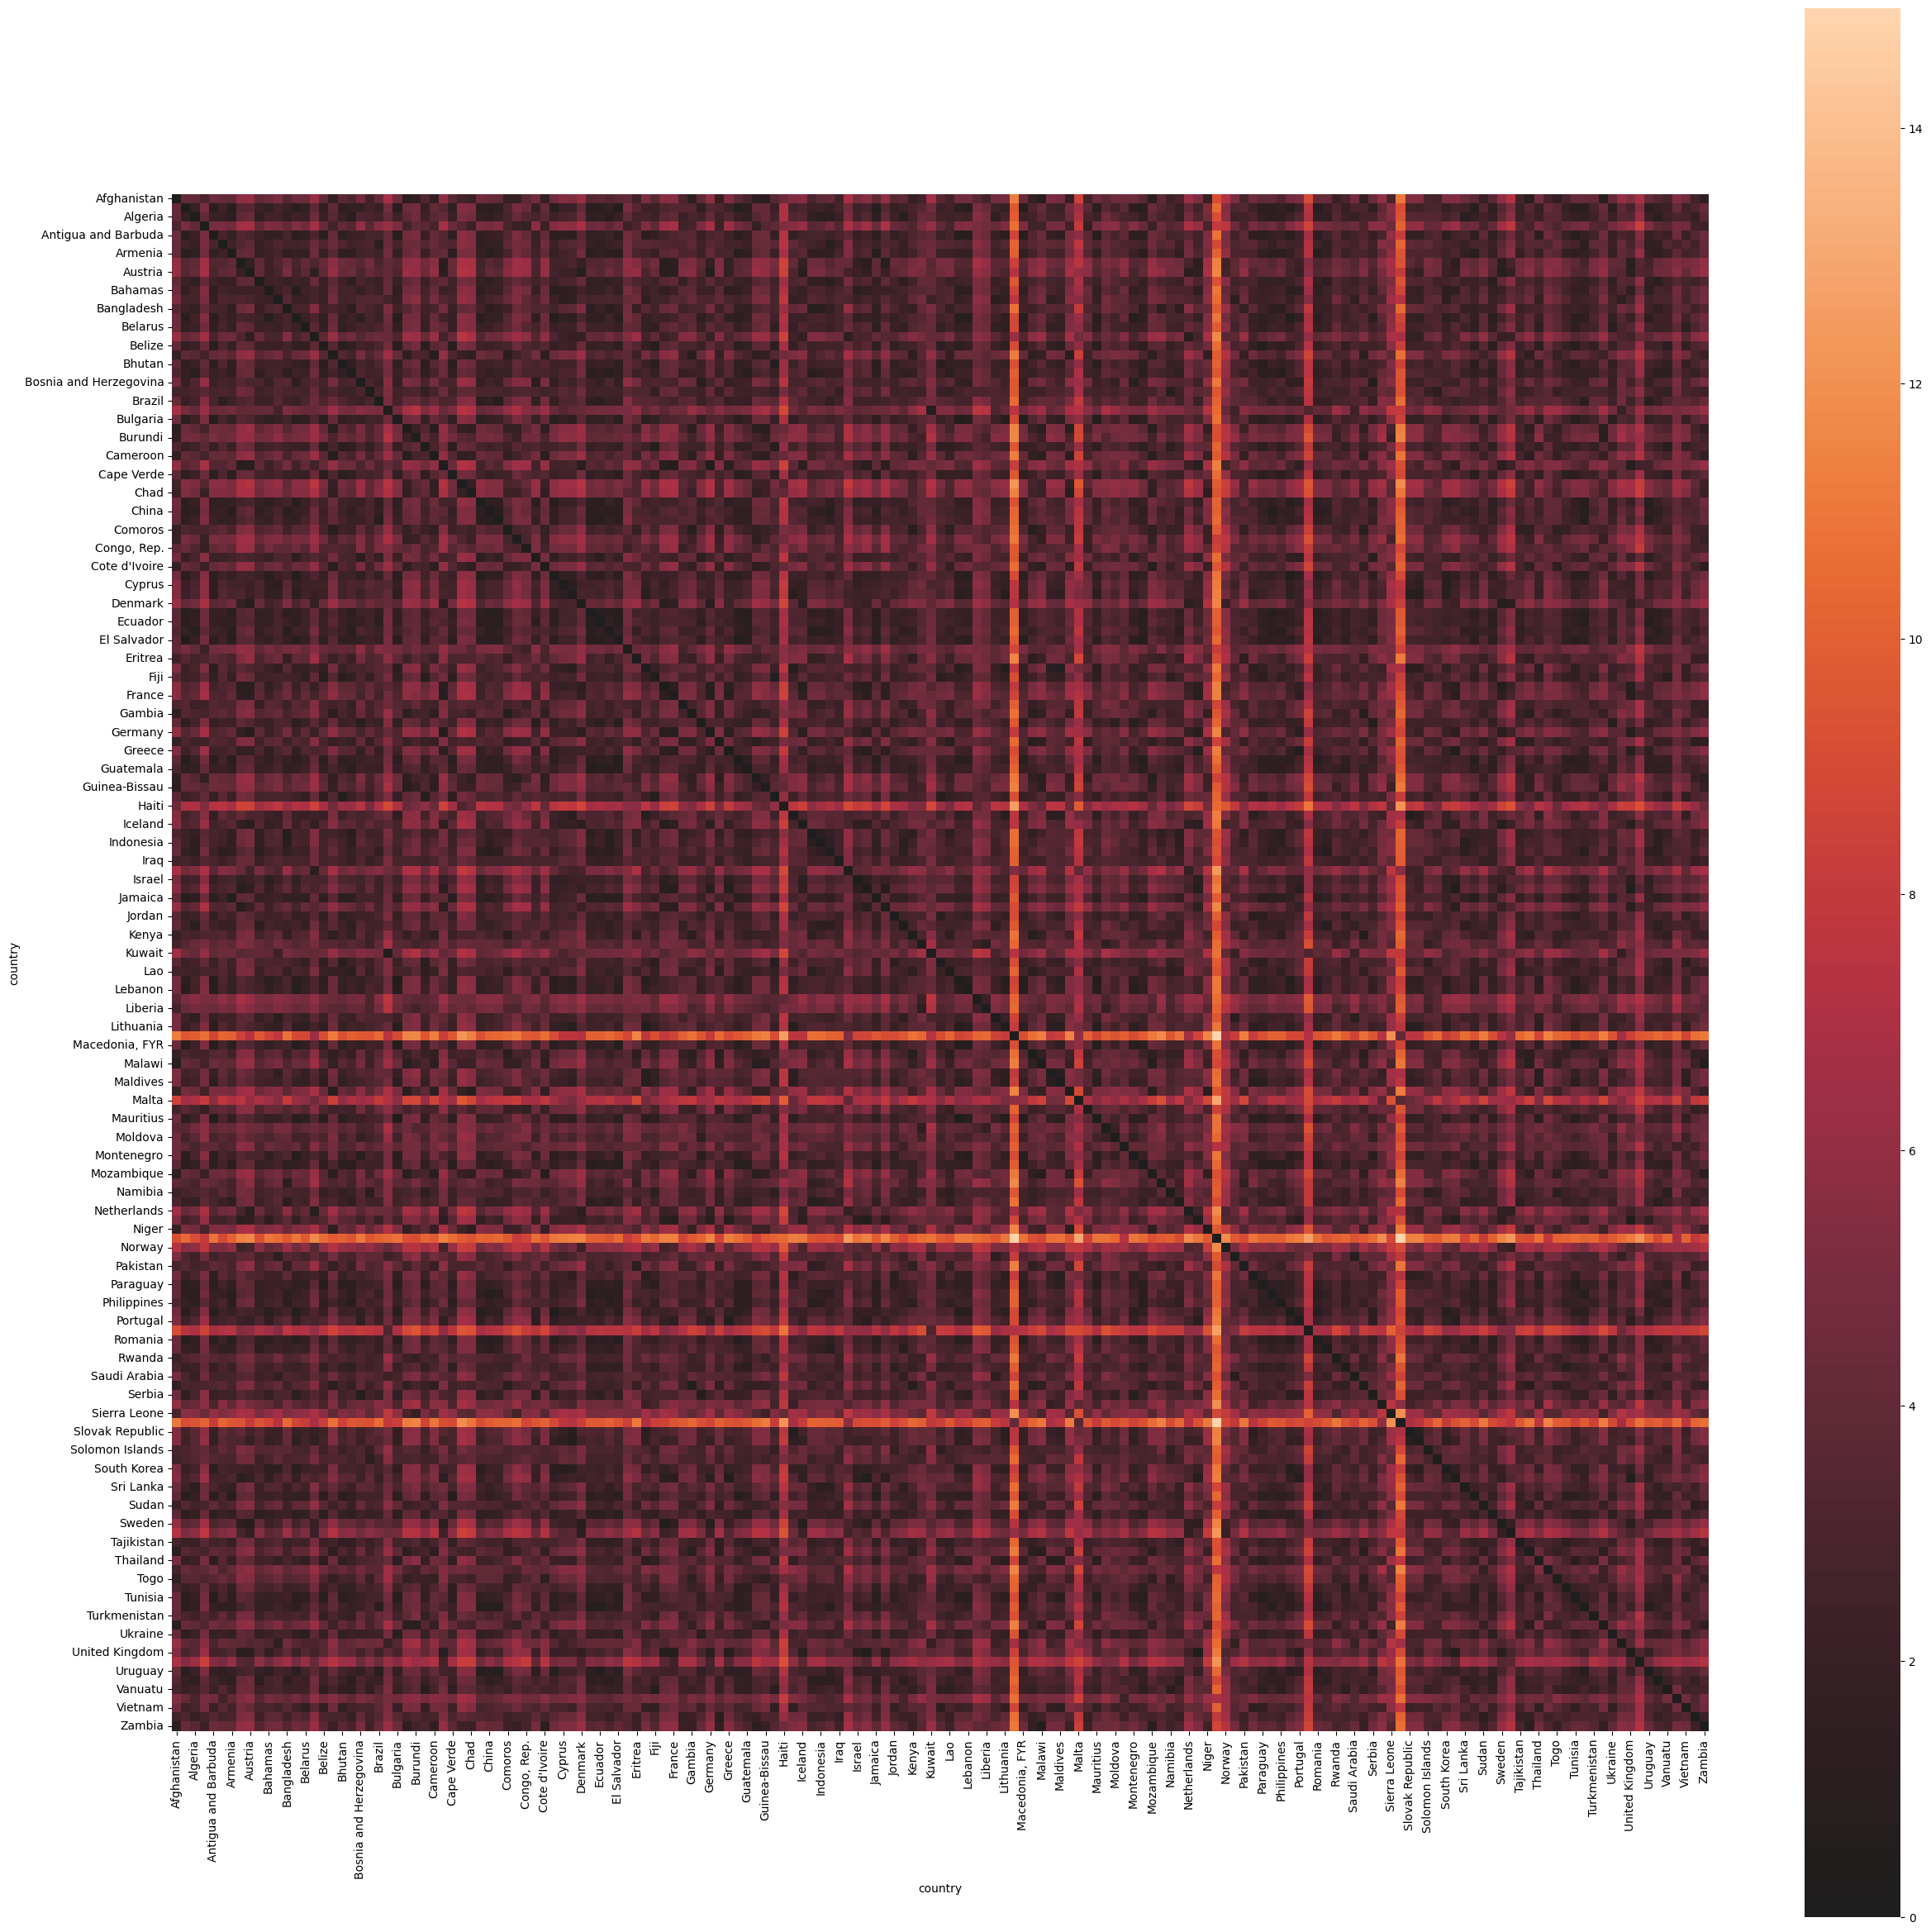

In [13]:
dist_mtx = scp.distance_matrix(df_normalized_1, df_normalized_1, p=2)
dist_mtx_df = pd.DataFrame(dist_mtx, index=df_normalized_1.index, columns=df_normalized_1.index)
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dist_mtx_df, center=0, square=True, annot=False)

Alguns países são bem proximos quando interpretamos a matrix de distância. Daqui, o que podemos perceber é que existem países bem destacados e que não se aproximam muito dos demais, como é o caso da Lithuania ou da Noruega. Esses podem ser casos a serem estudados quando a clusterização for realizada.

### APLICANDO N_CLUSTERS = 3 COM KMEANS

In [14]:
kmeans = KMeans(n_clusters = 3)
k_fit_1 = kmeans.fit(df_normalized_1)

clusters = k_fit_1.labels_
df_w_cluster = df_country_data.copy()
df_w_cluster['cluster'] = clusters
df_w_cluster.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979


Fazendo uma breve análise, pode ser perceber que o cluster separou os grupos com relação ao IDH, que compreende as váriaveis de PIB, PIB per capita, expectativa de vida, lucro por pessoa e investimento em saúde. Dessa forma, os países do grupo 0 são os que apresentam o melhor IDH, os países do grupo 1 o que apresentam o pior IDH e o grupo 2 está na média entre ambos os grupos.

### APLICANDO N_CLUSTERS = 3 COM HCLUSTER

In [15]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(df_normalized_1)
labels_hier = agg_cluster.labels_
df_w_hier = df_country_data.copy()
df_w_hier['cluster'] = labels_hier

df_w_hier.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235
1,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925
2,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889


## INTERPRETE CADA CLUSTER KMEANS

### DISTRIBUIÇÃO DAS DIMENSÕES DE CADA GRUPO 

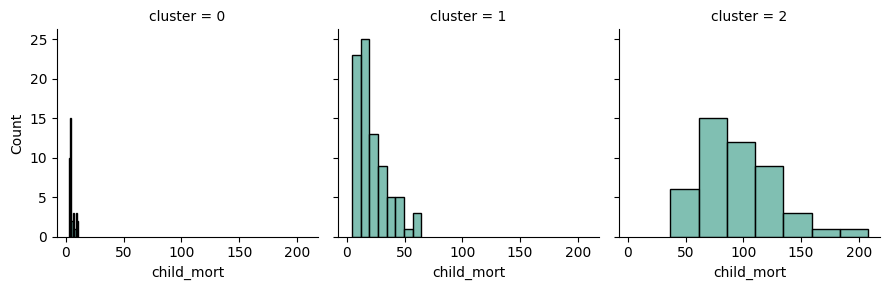

In [37]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[0])

O Cluster 0 tem o menor indice de mortalidade infantil, o cluster 2 é o grupo que tem o maior indice e o cluster 1 está entre os dois anteriores.

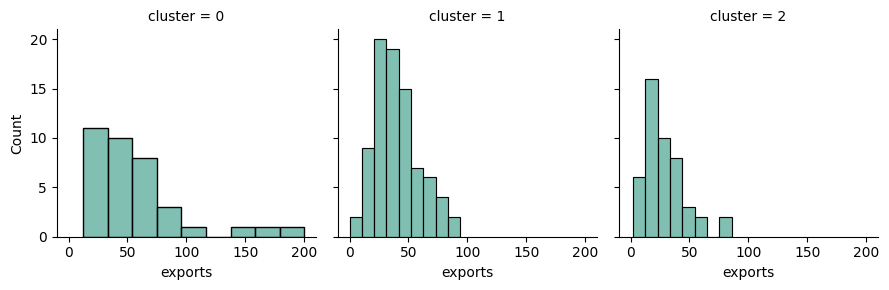

In [38]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[1])

O Cluster 2 tem o menor indice de exportação, ficando entre 0 e 50. O Cluster 0 tem o maior indice, que tem valores distribuidos entre 0 a 200 e o cluster 1 se encontra entre ambos, com a faixa dividida entre 0 e 100

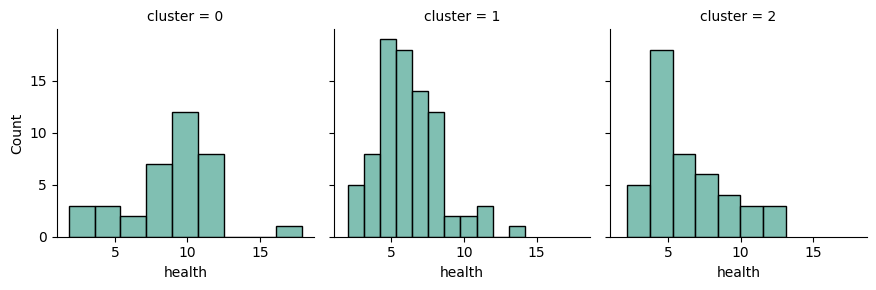

In [47]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[2])


O Cluste 0 é o que tem o menor gasto com saúde per capita. O Cluster 1 apresenta o maior indice e o cluster 2 está próximo ao cluster 1

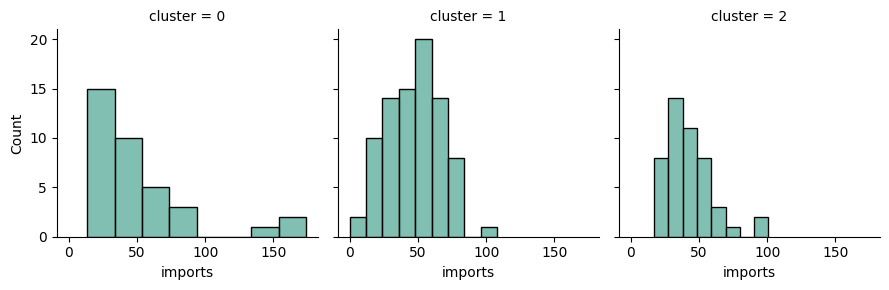

In [40]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[3])

As importações são maiores no cluster 1, o cluster 0 não apresenta muitas importações e o cluster 2 está entre ambos.

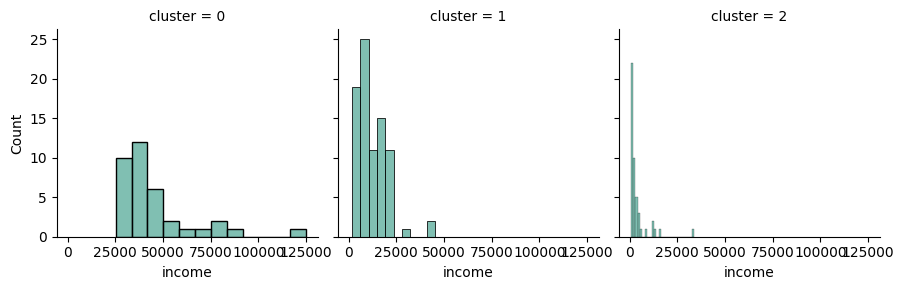

In [41]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[4])

O lucro liquido por pessoa tem maiores valores no cluster 0, em contra partida o cluster 1 tem uma grande quantidade de lucros na faixa de 0 a 2500. O cluster 2 é o que apresenta o menor número.

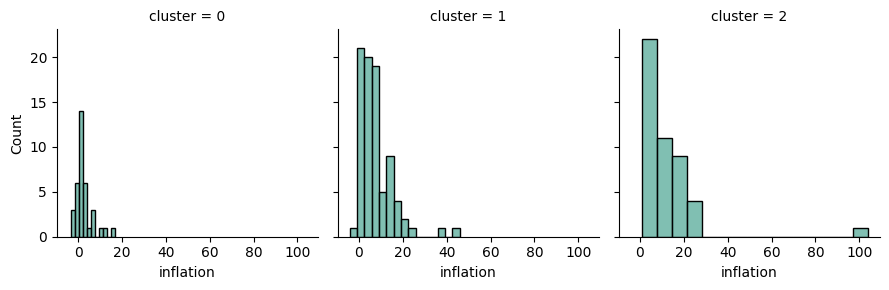

In [42]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[5])

O Cluster 0 tem o indice de inflação muito próximo a 0. O cluster 1 divide a inflação na faixa de 0 a 20. O mesmo acontece, mas em menor quantidade, no cluster 2 em relação ao cluster 1.

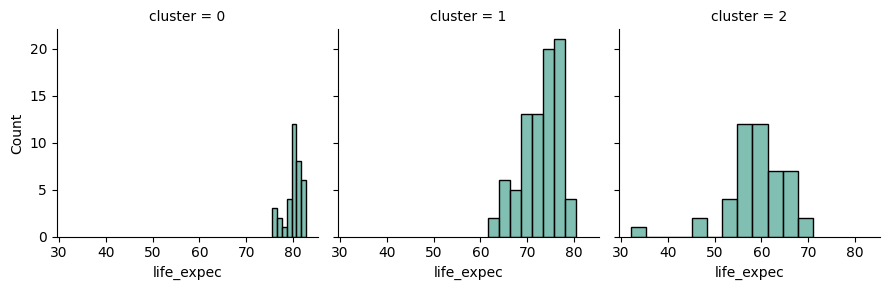

In [43]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[6])

A expectativa de vida é maior no cluster 0. No cluster 1 ela esta entre 60 e 80 anos. O Cluster 2 tem os piores indices de expectativa de vida, variando de aproximadamente 35 a 70 anos.

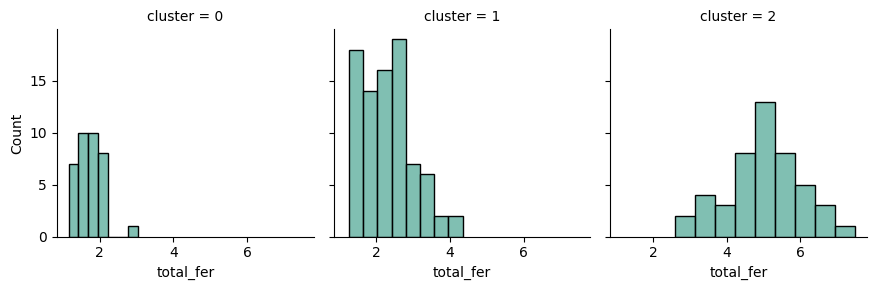

In [44]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[7])

O indice de fertilidade no cluster 0 esta entre 0 e 2. No cluster 1 o range é maior, variando até 4. Ja no cluster 2, esse indice é maior ainda, variando de aproximadamente 3 até aproximadamente 7.

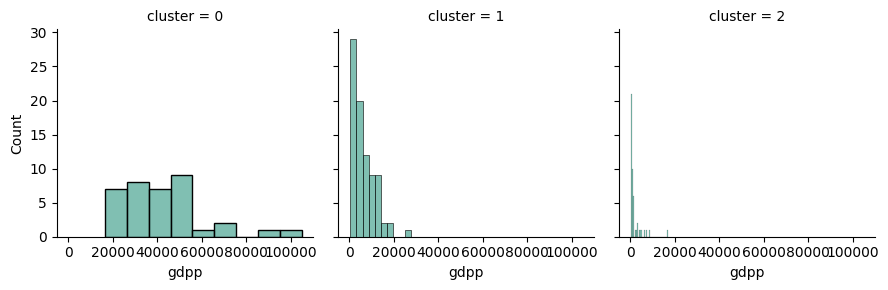

In [45]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_w_cluster, col = 'cluster')
g.map(sns.histplot, x_vars[8])

O PIB por pessoa tem maiores valores no cluster 0, em contra partida o cluster 1 tem uma grande quantidade de PIB per capita na faixa de 0 a 20000. O cluster 2 é o que apresenta o menor número.

## INTERPRETE CADA CLUSTER HIERARQUICO

### CLUSTERIZAÇÃO HIERARQUICA COM DENDOGRAMA

Text(0, 0.5, 'Euclidean Distance')

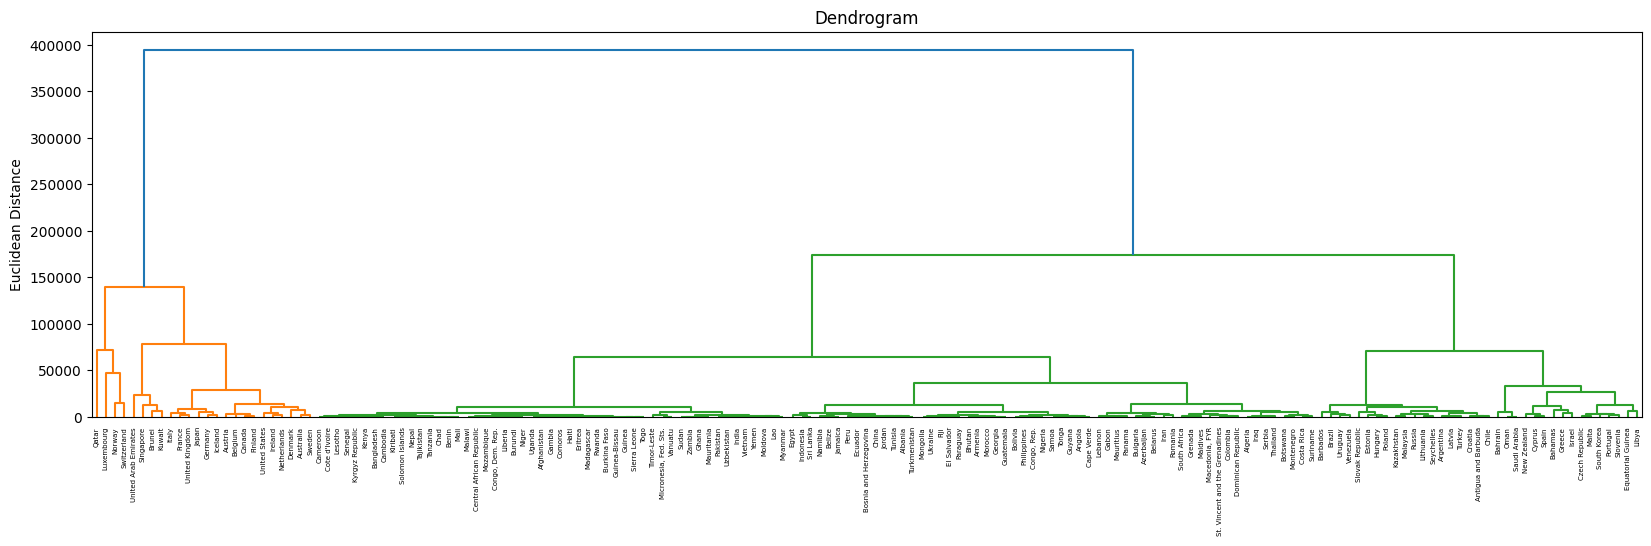

In [16]:
plt.figure(figsize=(20, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df_country_data, method='ward'), labels=df_country_data.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

## COMPARE OS RESULTADOS DE AMBOS

### COMPARANDO OS DOIS RESULTADOS

Comparando o Dendograma com o KMeans e levando em consideração os 3 clusteres em questão, conseguimos identificar que a clusterização hierarquica também encontra 3 grupos principais de países. Agora é necessário separar esses grupos e comparar com a clusterização KMeans e verificar se os grupos são iguais.

In [17]:
df_w_cluster.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979


In [48]:
df_w_hier.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235
1,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925
2,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889


Comparando a média dos grupos em ambos os tipos de clusterização, podemos perceber que os grupos são muito parecidos, considerando que o hierarquico 0 = Kmeans 0, hierarquico 1 = KMeans 1, hierarquico 2 = KMeans 2

In [18]:
df_for_comparation = df_country_data.copy()
df_for_comparation['kmeans_cluster'] = k_fit_1.labels_
df_for_comparation['hier_cluster'] = agg_cluster.labels_

Hier = 0 -> Kmeans = 0 
 Hier = 1 -> KMeans = 1 
 Hier = 2 -> KMeans = 2


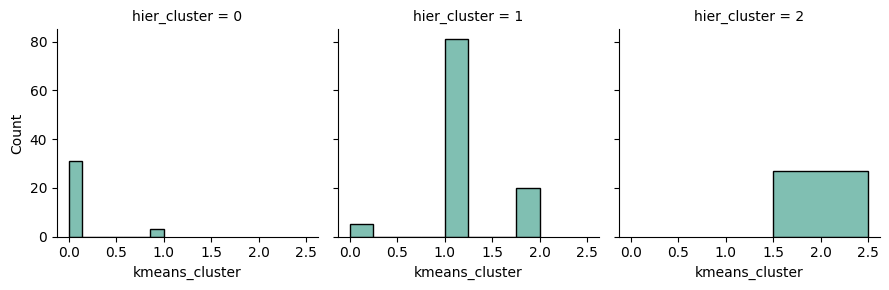

In [19]:
sns.set_palette('dark:#5A9_r')
g = sns.FacetGrid(df_for_comparation, col="hier_cluster")
g.map(sns.histplot, 'kmeans_cluster')
print('Hier = 0 -> Kmeans = 0 \n Hier = 1 -> KMeans = 1 \n Hier = 2 -> KMeans = 2')

O Cluster Hierarquico 2 teve o maior indice de match com o seu respectivo par no KMeans. O Cluster Hierarquico 0 tem alguns matchs entre o grupo 1 do KMeans, sendo que o grupo que mais se aproxima da média é o KMeans = 0. O Cluster Hierarquico 1 é o que mais apresenta confusões entre os grupos do KMeans, tendo matchs em todos os 3 grupos, sendo majoritáriamente o KMeans = 1

In [20]:
from geopy.geocoders import Nominatim

list_longitude = []
list_latitude = []


for i in df_country_data.index:
    geolocator = Nominatim(user_agent='Localizador')
    location = geolocator.geocode(i)
    if location != None:
        list_longitude.append(location.longitude)
        list_latitude.append(location.latitude)
    else:
        list_longitude.append(None)
        list_latitude.append(None)


In [21]:
for i in df_country_data.index:
    geolocator = Nominatim(user_agent='Localizador')
    location = geolocator.geocode(i)
    if location == None:
        print(i)

Congo, Dem. Rep.
Congo, Rep.
Macedonia, FYR
Micronesia, Fed. Sts.


In [22]:
keys = ['Congo', 'Congo', 'Macedonia', 'Micronesia']

for i in keys:
    for j in range(0,len(list_latitude)):
        if list_latitude[j] == None:
            location = geolocator.geocode(i)
            list_latitude[j] = location.latitude
            break


In [23]:
keys = ['Congo', 'Congo', 'Macedonia', 'Micronesia']

for i in keys:
    for j in range(0,len(list_longitude)):
        if list_latitude[j] == None:
            location = geolocator.geocode(i)
            list_longitude[j] = location.list_longitude
            break


In [24]:
df_for_comparation['latitude'] = list_latitude
df_for_comparation['longitude'] = list_longitude

In [25]:
import plotly.express as px
fig = px.scatter_mapbox(df_for_comparation, lat="latitude", lon="longitude", color= 'kmeans_cluster',
                  color_discrete_sequence = ['fuchsia'], size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Plotando os grupos de cluster que o KMeans encontrou no mapa, conseguimos extrair melhor as informações do que cada grupo representa. O grupo do cluster 2 esta localizado, majoritariamente na africa, que são países, de forma geral, menos desenvolvidos. O grupo do Cluster 0 está, em sua maioria, distribuidos na Europa. Já, o grupo do Cluster 1, distribui seus pertencentes pelo resto do globo, em regiões que estão em desenvolvimento, como América do Sul e parte da Asia e Oceania.

In [26]:
fig = px.scatter_mapbox(df_for_comparation, lat="latitude", lon="longitude", color= 'hier_cluster',
                  color_discrete_sequence = ['fuchsia'], size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Similar ao KMeans, o cluster hierarquico trás o cluster 2 concetrado no continente Africano, o Cluster 0 focado na Europa e em países mais desenvolvidos e o cluster 1 nos emergentes. Entretanto, o cluster hierarquico coloca alguns países do continente como emergentes. O mesmo ocorre com alguns países próximos à Asia e Oceania.

# ESCOLHA DE ALGORITMOS

## ESCREVA EM TÓPICOS AS ETAPAS DO ALGORITMO KMEANS ATÉ SUA CONVERGÊNCIA

- Definir a quantidade de Clusters
- O Algoritmo posiciona K centroides aleatoriamente no espaço, sendo 
K = a quantidade de clusters definida pelo usuário.
- O Algoritmo calcula a distância de cada ponto até os centroides. O 
ponto pertence ao centroide mais próximo.
- Depois de definir a que cluster cada ponto pertence, o algoritmo 
reposiciona os centroides no centro da distribuição dos pontos.
- Repete a operação número 3 e 4 na sequência. O Algoritmo tem sua 
convergência no momento em que os centroides não mudam de posição 
ou mudam a sua posição a uma curta distância.

## REALIZE KMEDOIDES E INTEPRETE

In [27]:
kmeans_medoids = KMedoids(n_clusters = 3, random_state = 1)
k_fit_2 = kmeans_medoids.fit(df_normalized_1)
labels_medoids = k_fit_2.labels_

df_w_kmedoids = df_country_data.copy()
df_w_kmedoids['cluster'] = labels_medoids
df_w_kmedoids.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,11.738667,57.033333,7.368267,57.673333,28786.266667,3.915533,76.390667,1.958800,23454.746667
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,25.366667,27.057533,6.340889,33.688131,11531.111111,9.799467,72.704444,2.444889,7012.355556


O KMedoids apresentou um resultado diferente dos outros 2 Clusters, computando uma media bem diferente entre os outros grupos.

In [50]:
df_w_kmedoids['latitude'] = list_latitude
df_w_kmedoids['longitude'] = list_longitude

In [51]:
fig = px.scatter_mapbox(df_w_kmedoids, lat="latitude", lon="longitude", color= 'cluster',
                  color_discrete_sequence = ['fuchsia'], size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Similar aos clusteres anteriores, o KMedoides deixa o continente africano bem destacado. Em contrapartida, o cluster 'Europa/Desenvolvidos' fica mais esparço, tendo ocorrências na América do Sul e Central, e em quase toda Europa e Asia. Uma diferença entre eles também é a presença dos EUA como emergente, sendo que tanto no cluster hierarquico quanto no kmeans, os EUA eram classificados como 'Desenvolvido', sempre no mesmo grupo que a Europa.

## PORQUE KMEANS É SENSIVEL A OUTLIERS

O Kmeans é sensível a outliers porque ele calcula a média da distância 
entre os pontos do cluster em relação ao centroide toda vez que o 
algoritmo procura o baricentro da distribuição, com o objetivo de 
reposicionar o centroide. Se existe um outlier na distribuição, o centroide 
passa a ser deslocado muitas vezes, ou o resultado do cluster não é o 
melhor. Isso acontece porque o outlier faz com que o baricentro se 
desloque muito do ponto onde fica a maior concentração de dados, sendo 
assim, o cluster pode ser afetado por pontos de outros grupos.

## PORQUE DBSCAN É ROBUSTO A OUTLIERS

O Algoritmo DBScan responde a densidade de pontos em uma região. 
Ele leva em consideração uma distância épsilon, com uma quantidade 
mínima de pontos. Ou seja, definidos eps = 10 e minPoints = 3, se dentro 
de uma distância igual ou inferior a 10 a presença de, pelo menos, 3 pontos 
for encontrada, o algoritmo detecta uma área densa. Dessa forma, o 
DBScan se torna robusto a outliers porque, por via de regra, os outliers não 
estarão dentro de uma distância épsilon próximos a, pelo menos, a menor 
quantidade de pontos definidos pelo usuário.